# 1. Importation des bibliothèques

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report

# 2. Chargement et Nettoyage des données

In [2]:
# Charger le dataset
df = pd.read_csv("kc_house_data_NaN.csv")
# Affichage des premières lignes
print(df.head())

   Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0       3.0       1.00   
1           1  6414100192  20141209T000000  538000.0       3.0       2.25   
2           2  5631500400  20150225T000000  180000.0       2.0       1.00   
3           3  2487200875  20141209T000000  604000.0       4.0       3.00   
4           4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955       

In [3]:
# Suppression de colonnes inutiles
df.drop(["id", "date", "Unnamed: 0"], axis=1, inplace=True)

# Vérification des valeurs manquantes
print(df.isnull().sum())

# Suppression des valeurs manquantes
df.dropna(inplace=True)

# Statistiques descriptives
print(df.describe())

price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402029e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.671337e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_lot15 

# 3. Analyse exploratoire et visualisation

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402029e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.671337e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.007547      0.234292      3.409825      7.657915   
std        0.539683      0.086549      0.766390    

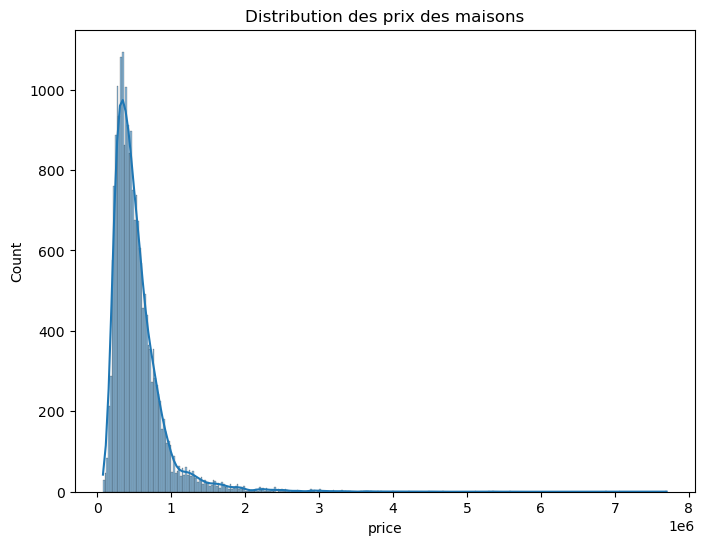

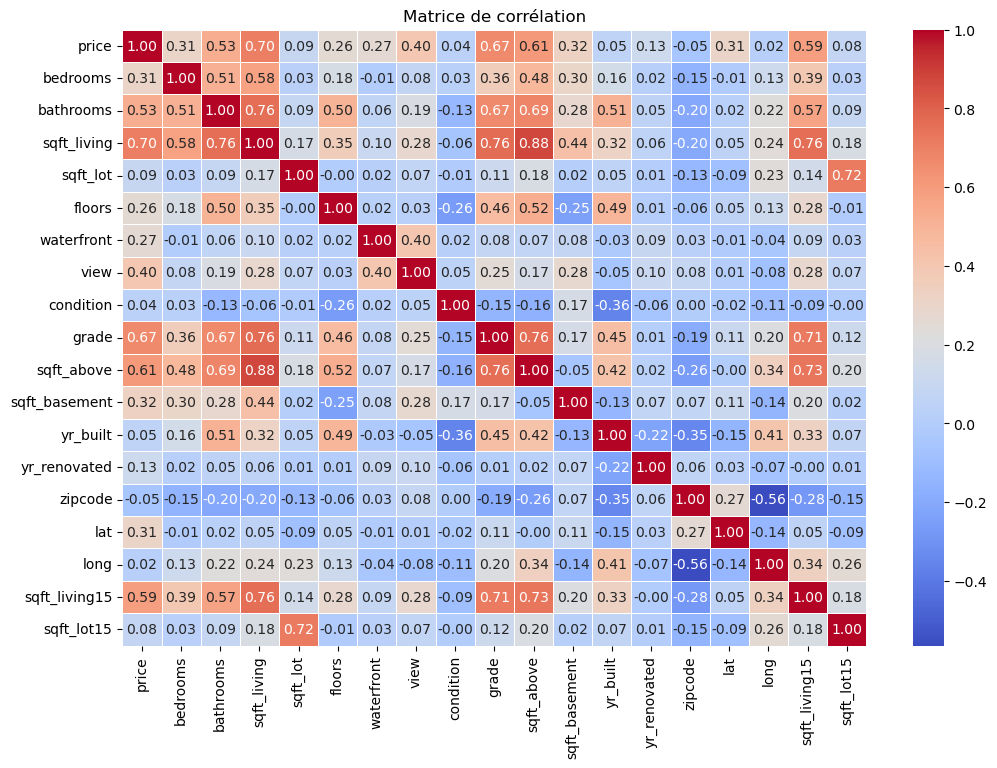

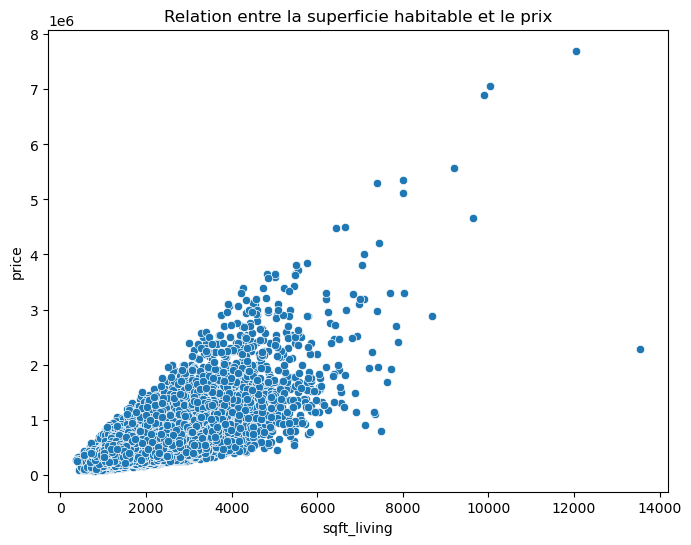

In [5]:
# Statistiques descriptives
print(df.describe())

# Visualisation de la distribution des prix (variable cible)
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution des prix des maisons')
plt.show()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

# Visualisation de la relation entre la superficie habitable et le prix
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.title('Relation entre la superficie habitable et le prix')
plt.show()


# 4. Préparation des Données

In [6]:
# Séparation des données en features et cible
X = df.drop(columns=["price"])
y = df["price"]

# Sélection des 5 variables les plus importantes
feature_importance_model = RandomForestRegressor()
feature_importance_model.fit(X, y)
importances = pd.Series(feature_importance_model.feature_importances_, index=X.columns)
top_5_features = importances.nlargest(5).index
X = X[top_5_features]

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
X.head()

,grade,sqft_living,lat,long,sqft_living15
0,7,1180,47.5112,-122.257,1340
1,7,2570,47.7210,-122.319,1690
2,6,770,47.7379,-122.233,2720
3,7,1960,47.5208,-122.393,1360
4,8,1680,47.6168,-122.045,1800


# 5. Entraînement et Évaluation des Modèles

In [8]:
# Liste de modèles de régression
regression_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}


In [9]:
# Test des modèles de régression
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}")


Linear Regression:
MAE: 141385.40
MSE: 51026989695.95
R²: 0.61

Ridge Regression:
MAE: 141383.05
MSE: 51026981381.43
R²: 0.61

Lasso Regression:
MAE: 141385.04
MSE: 51026967378.85
R²: 0.61

Random Forest Regressor:
MAE: 76543.63
MSE: 19492531845.38
R²: 0.85

Gradient Boosting Regressor:
MAE: 84981.57
MSE: 21914769679.14
R²: 0.83

Support Vector Regressor:
MAE: 217752.04
MSE: 136779888809.06
R²: -0.05

K-Neighbors Regressor:
MAE: 85513.95
MSE: 24551649356.84
R²: 0.81

Decision Tree Regressor:
MAE: 106348.93
MSE: 43395667234.66
R²: 0.67


In [10]:
# Conversion de la variable cible en classes pour la classification
threshold = df["price"].median()
df["price_category"] = df["price"].apply(lambda x: "High" if x > threshold else "Low")
y_class = df["price_category"]

# Encodage des classes
le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)

# Séparation en ensemble d'entraînement et de test pour la classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_scaled, y_class_encoded, test_size=0.2, random_state=42)

In [11]:
# Liste de modèles de classification
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

In [12]:
# Test des modèles de classification
for name, model in classification_models.items():
    model.fit(X_train_class, y_train_class)
    y_pred_class = model.predict(X_test_class)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(y_test_class, y_pred_class):.2f}")
    print(classification_report(y_test_class, y_pred_class))


Logistic Regression:
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2150
           1       0.80      0.83      0.81      2170

    accuracy                           0.81      4320
   macro avg       0.81      0.81      0.81      4320
weighted avg       0.81      0.81      0.81      4320


Random Forest Classifier:
Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2150
           1       0.90      0.91      0.90      2170

    accuracy                           0.90      4320
   macro avg       0.90      0.90      0.90      4320
weighted avg       0.90      0.90      0.90      4320


Gradient Boosting Classifier:
Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2150
           1       0.90      0.90      0.90      2170

    accuracy                           0.90      4320
   

# 6. Sélection du Meilleur Modèle et Sauvegarde

### incompatibilités entre les versions de scikit-learn 1.3+ et les versions antérieures.
### Le meilleur modèle cest radom forest et radom forest classifier, pour deployer j'ai pris un modèle simple compatible pour l'exercice

In [21]:
# Sauvegarde du meilleur modèle de régression
best_model = LinearRegression()
best_model.fit(X_train, y_train)
joblib.dump(best_model, "model.joblib")

['model.joblib']

In [22]:
best_class_model = LogisticRegression()  # Ou un autre modèle
best_class_model.fit(X_train_class, y_train_class)
joblib.dump(best_class_model, "classification_model.joblib")

['classification_model.joblib']